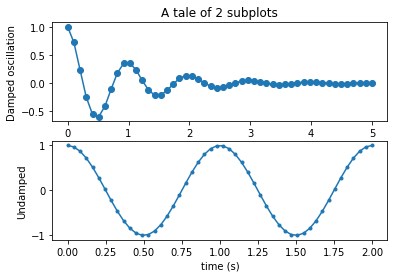

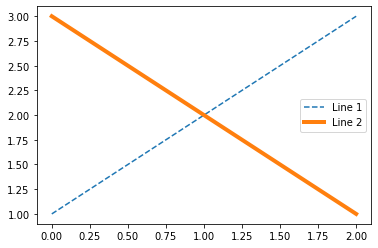

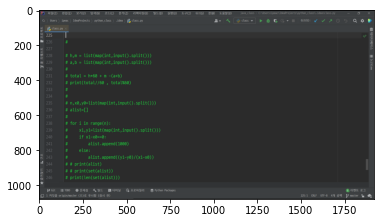

[]
[]


,측정소,pm10


In [8]:
import numpy as np
import matplotlib.pyplot as plt

#Multiple subPlot
x1 = np.linspace(0.0,5.0) #균일 간격 점을 생성합니다.
x2 = np.linspace(0.0,2.0)
y1 = np.cos(2*np.pi*x1) *np.exp(-x1)
y2 = np.cos(2*np.pi*x2)

plt.subplot(2,1,1) #2행 1열 중 1
plt.plot(x1,y1,'-o')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')
plt.subplot(2,1,2)
plt.plot(x2,y2,'.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.show()

plt.plot([1,2,3], label="Line 1",linestyle='--')
plt.plot([3,2,1], label="Line 2",linewidth=4)
plt.legend()
plt.show()

import matplotlib.image as mpimg
img = mpimg.imread('image1.png')
plt.imshow(img)
plt.show()

#대기오염정보 추출
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request as ulib

url ='http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty?serviceKey=dbF5RsIKFOsDPuvMKW5rKghkmmWovFeVmUxyzZv9vaMH%2Fzeulk7mHmegmzbC7gA%3D%3D&returnType=xml&numOfRows=100&pageNo=1&sidoName=%EC%B6%A9%EB%B6%81&ver=1.0'

res = ulib.urlopen(url)
air = BeautifulSoup(res,"html.parser")

df1 = []
df2 = []
for item in air.findAll("item"):
    for stationname in item.findAll ("stationname"):
        # print(stationname.string)
        df1.appned(stationname.string)
    for pm10value in item.findAll("pn10value"):
        df2.append(pm10value.string)
print(df1)
print(df2)
df= pd.DataFrame({'측정소':df1,'pm10':df2},)
df.head()























